In [89]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import umap
import math as m
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [50]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [53]:
len(data_set.columns)
data_set.head()

,0.2499,0.25,0.2501,0.2502,0.2503,0.2504,0.2505,0.2506,0.2507,0.2508,...,0.9991,0.9992,0.9993,0.9994,0.9995,0.9996,0.9997,0.9998,0.9999,1.0
20.0degC,-0.084270,-0.084675,-0.084302,-0.084049,-0.083852,-0.083686,-0.083539,-0.083403,-0.083273,-0.083147,...,-0.048298,-0.048298,-0.048298,-0.048298,-0.048298,-0.048298,-0.048298,-0.048298,-0.048298,-0.048299
20.1degC,-0.085989,-0.086626,-0.086394,-0.086222,-0.086073,-0.085934,-0.085802,-0.085674,-0.085548,-0.085423,...,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.048308,-0.048308,-0.048308
20.2degC,-0.085702,-0.086408,-0.086214,-0.086064,-0.085925,-0.085793,-0.085665,-0.085539,-0.085413,-0.085289,...,-0.048317,-0.048318,-0.048318,-0.048318,-0.048318,-0.048318,-0.048318,-0.048318,-0.048318,-0.048318
20.3degC,-0.076534,-0.077020,-0.076720,-0.076518,-0.076357,-0.076219,-0.076092,-0.075972,-0.075856,-0.075742,...,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346,-0.048346
20.4degC,-0.083390,-0.084169,-0.084016,-0.083889,-0.083764,-0.083641,-0.083518,-0.083396,-0.083274,-0.083153,...,-0.048351,-0.048351,-0.048351,-0.048352,-0.048352,-0.048352,-0.048352,-0.048352,-0.048352,-0.048352


In [60]:
print((data_set.iloc[1, 0]))

-0.08598934


In [ ]:
for cellName in ["3_C10"]:
    data_set = pd.read_csv(cellName+".csv", index_col=0)
    raster_plot

[[0.2499 0.25   0.2501 ... 0.     0.     0.    ]
 [0.2499 0.25   0.2501 ... 0.     0.     0.    ]
 [0.2499 0.25   0.2501 ... 0.     0.     0.    ]
 ...
 [0.2499 0.25   0.2501 ... 0.     0.     0.    ]
 [0.2499 0.25   0.2501 ... 0.     0.     0.    ]
 [0.2499 0.25   0.2501 ... 0.     0.     0.    ]]
(201, 7502)
(201, 7502)


TypeError: plot_surface() missing 1 required positional argument: 'Z'

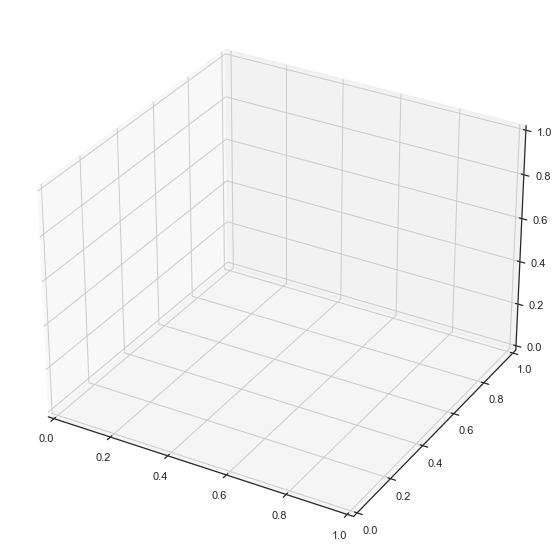

In [91]:
#for cellName in ["3_C10", "3_C11A", "3_C21B", "3_C23", "3_C31", "3_C51A", "3_C51B",
#                 "4_C10", "4_C11A", "4_C21B", "4_C23", "4_C31", "4_C51A", "4_C51B"]:

plt.figure
for cellName in ["3_C10"]:
    data_set = pd.read_csv(cellName+".csv", index_col=0)
    N = data_set.shape
    Y_feat = np.zeros((N[0], 1))
    T_feat = np.zeros((N[1], 1))
    Z = np.zeros(N)
    for temp_ind in range(N[0]):
        Y_feat[temp_ind] = temp_ind
        for time_ind in range(N[1]//100):
            if temp_ind == 0:
                T_feat[time_ind] = float(data_set.columns[time_ind])
            Z[temp_ind, time_ind] = data_set.iloc[temp_ind, time_ind]
            
    [T, Y] = np.meshgrid(T_feat, Y_feat) 
    print(T)
    print(Y.shape)
    print(Z.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(T, Y, Z)
        

    #ax = data_set.plot.scatter(x='length',
    #                  y='width',
    #                  c='species',
    #                  colormap='viridis')

Number of clusters: 3


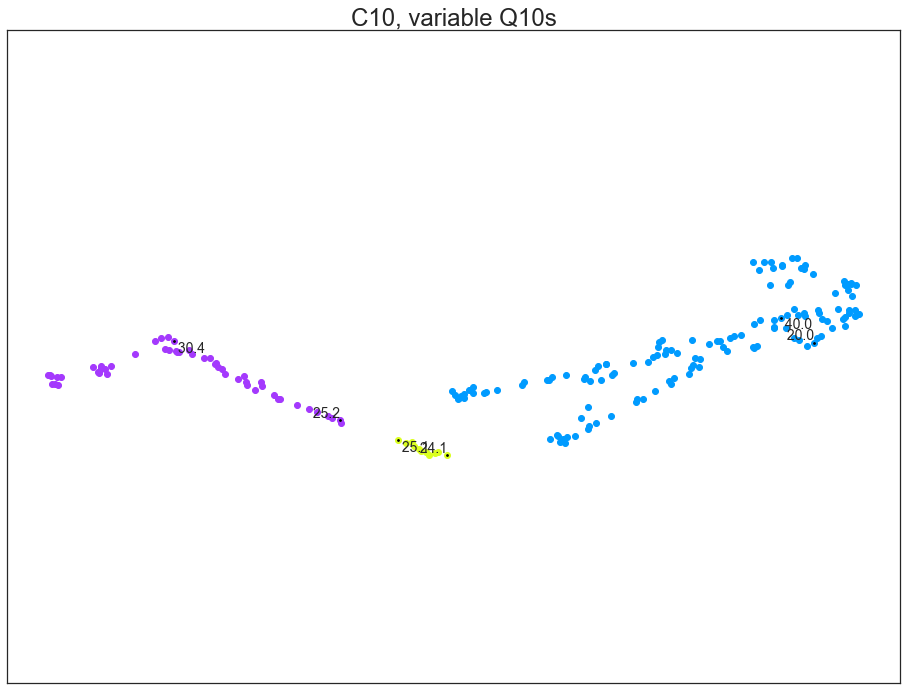

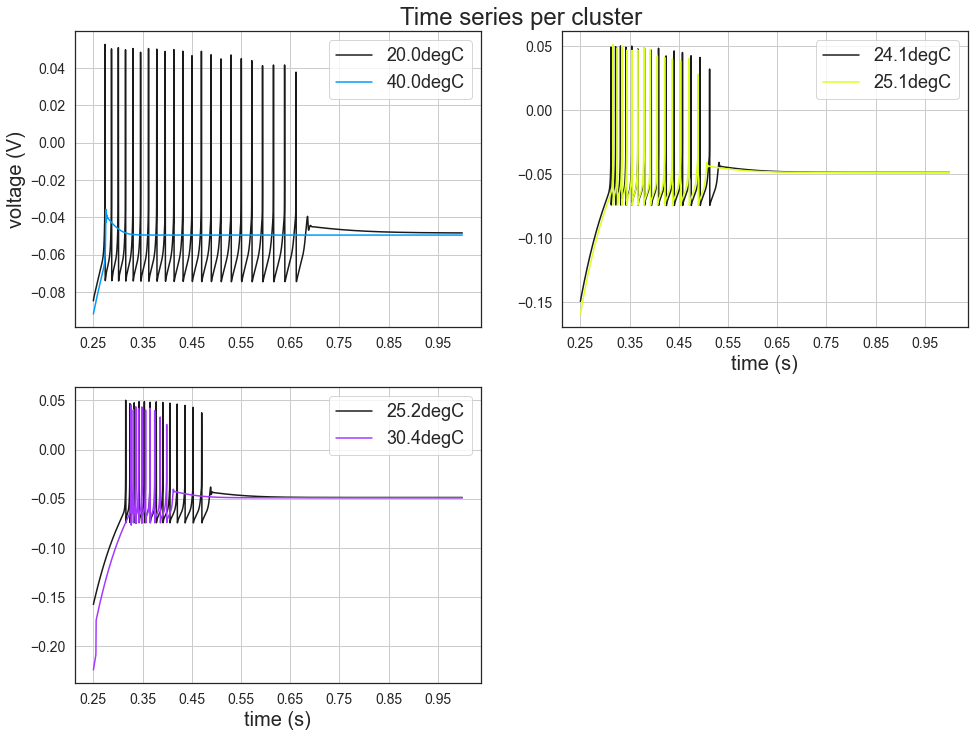

Number of clusters: 4


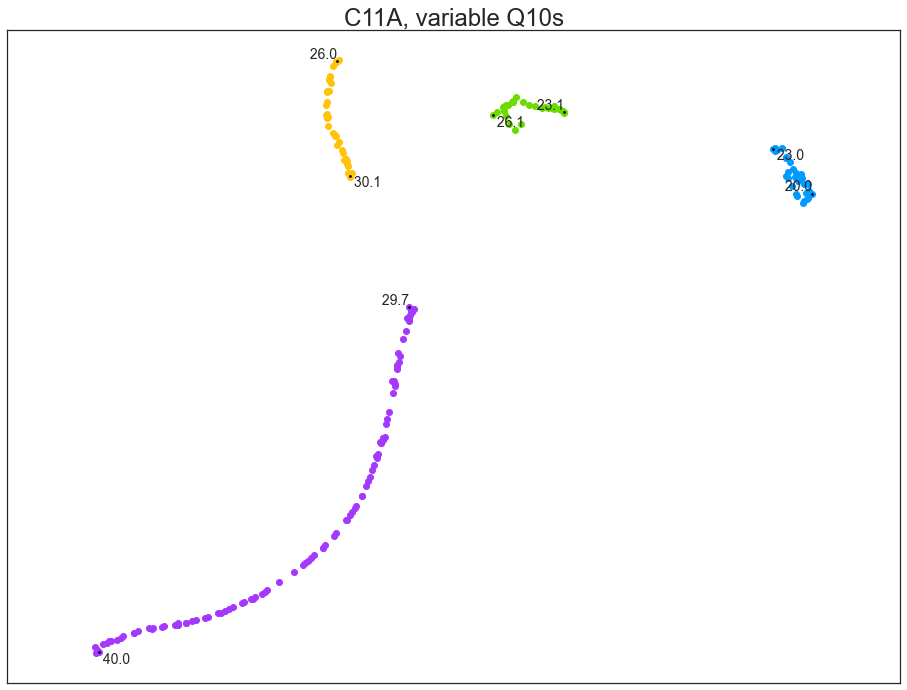

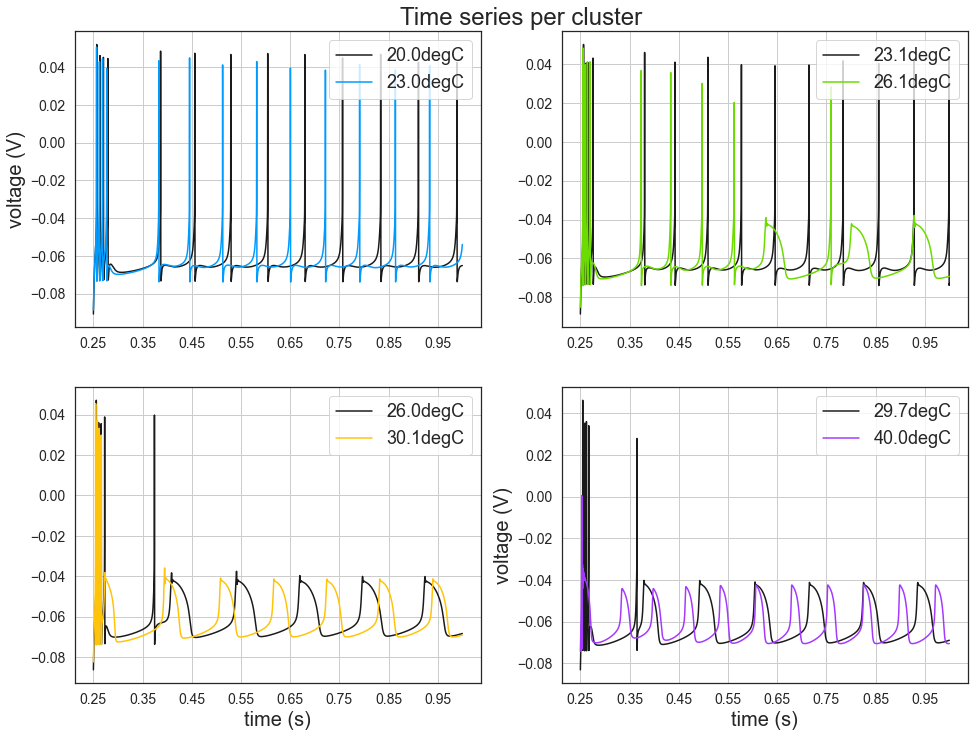

Number of clusters: 2


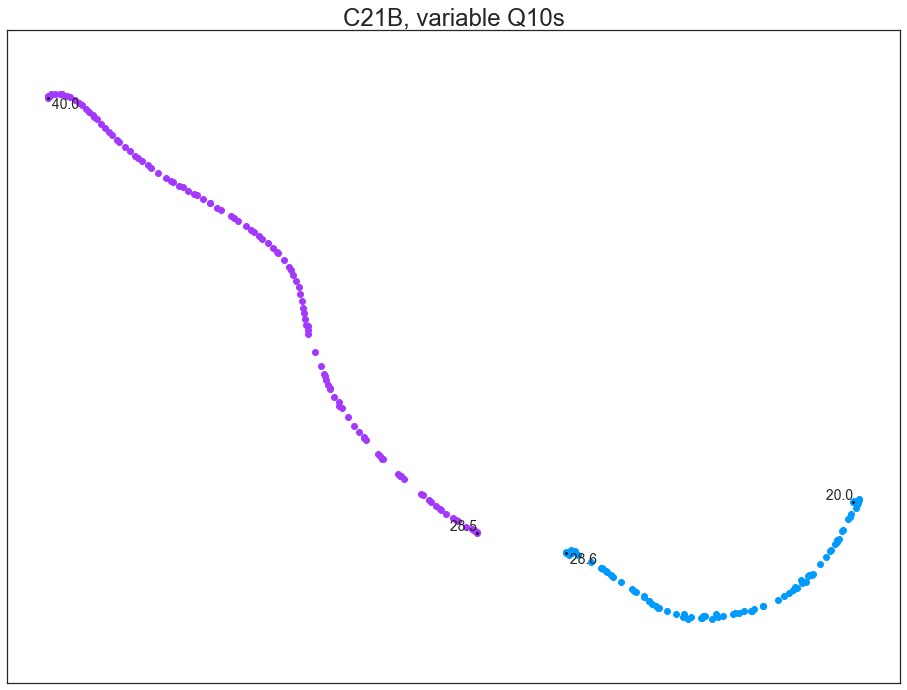

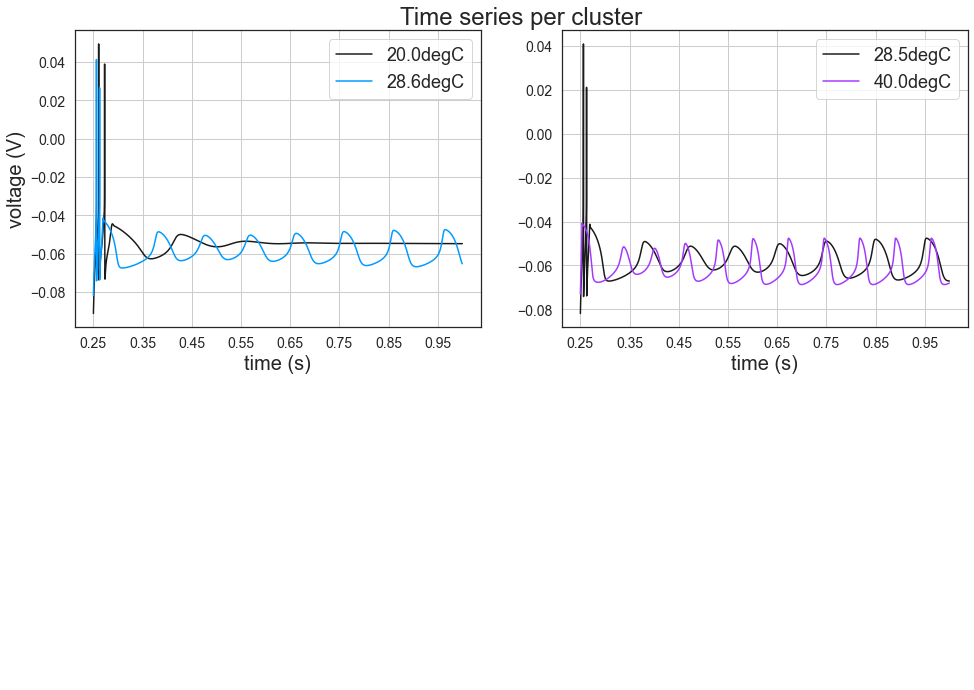

Number of clusters: 3


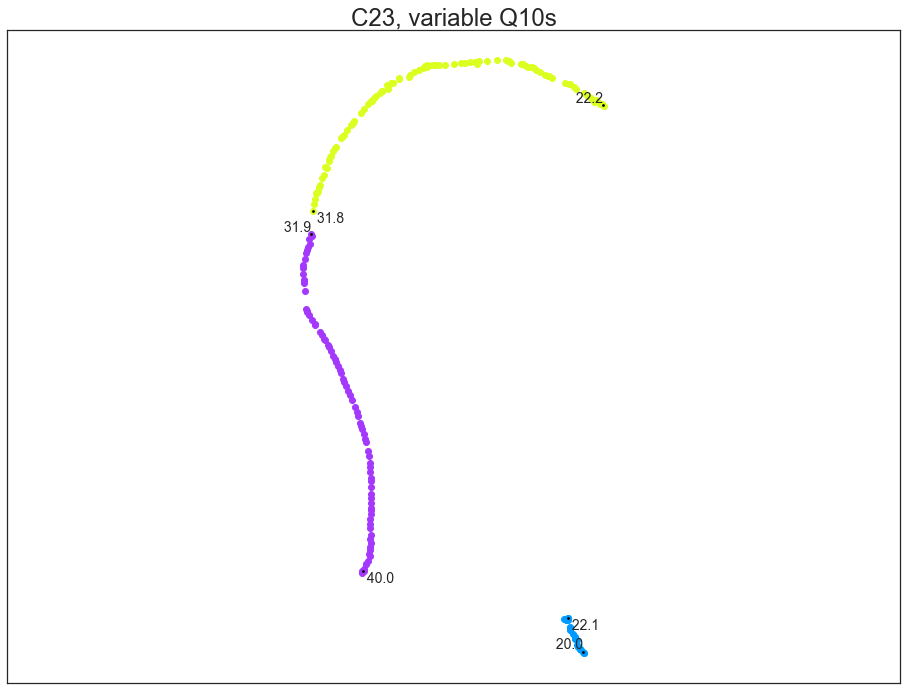

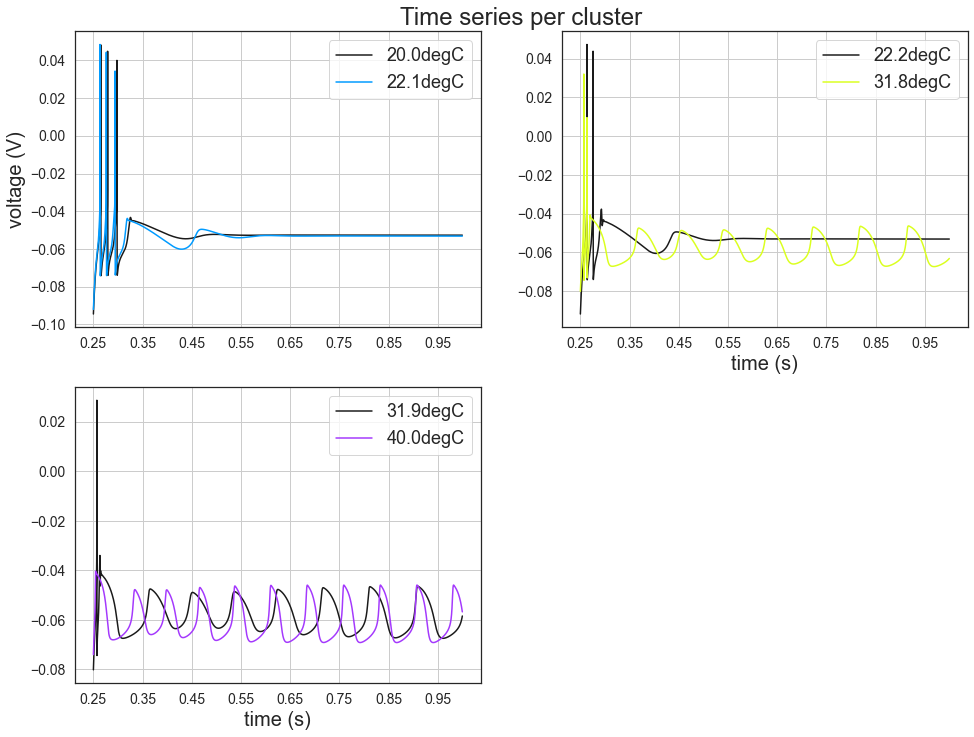

Number of clusters: 2


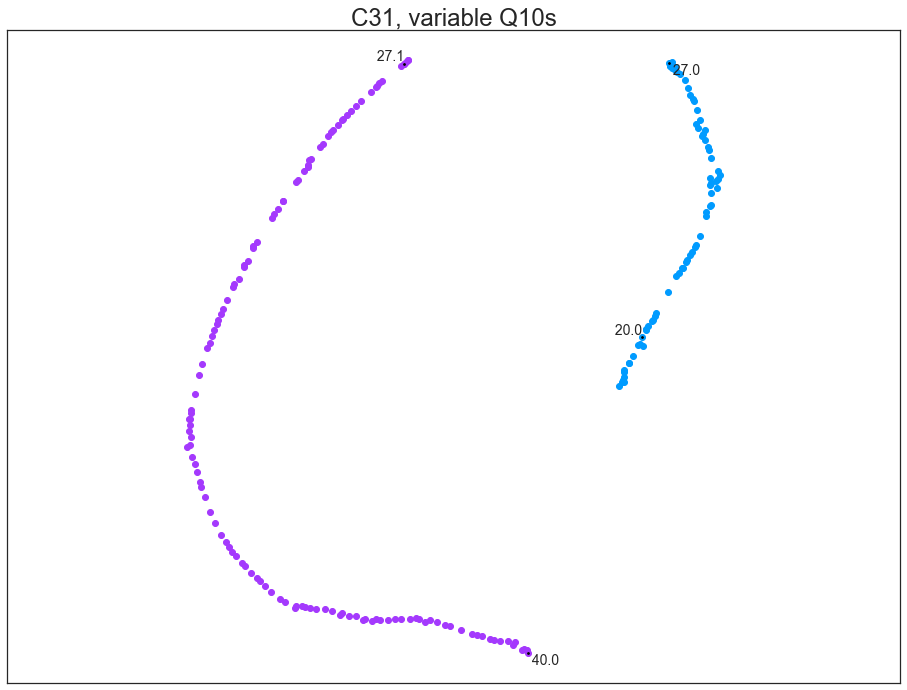

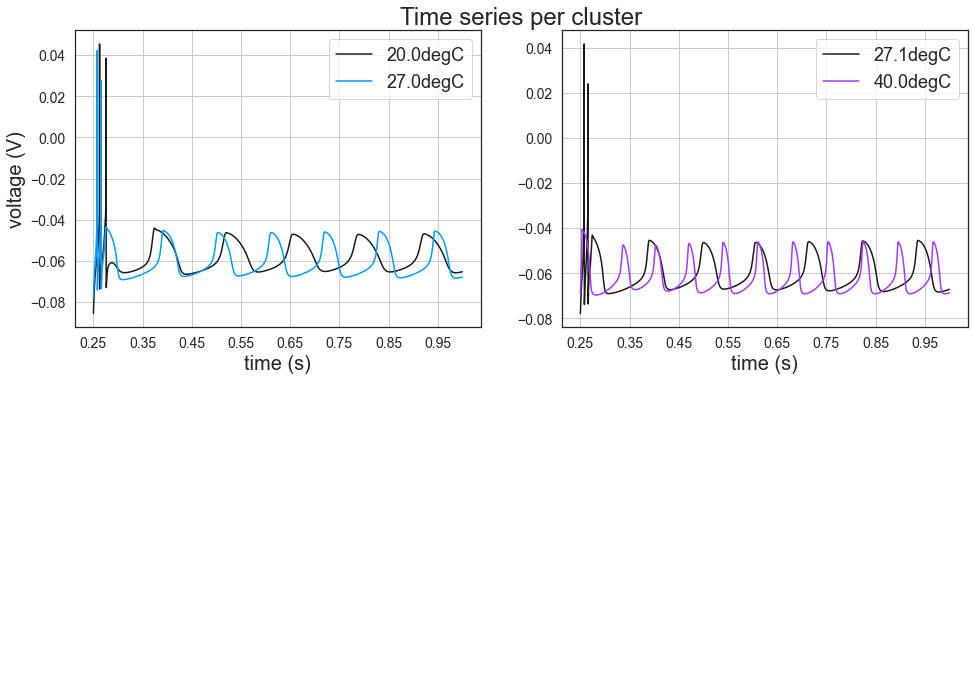

Number of clusters: 10


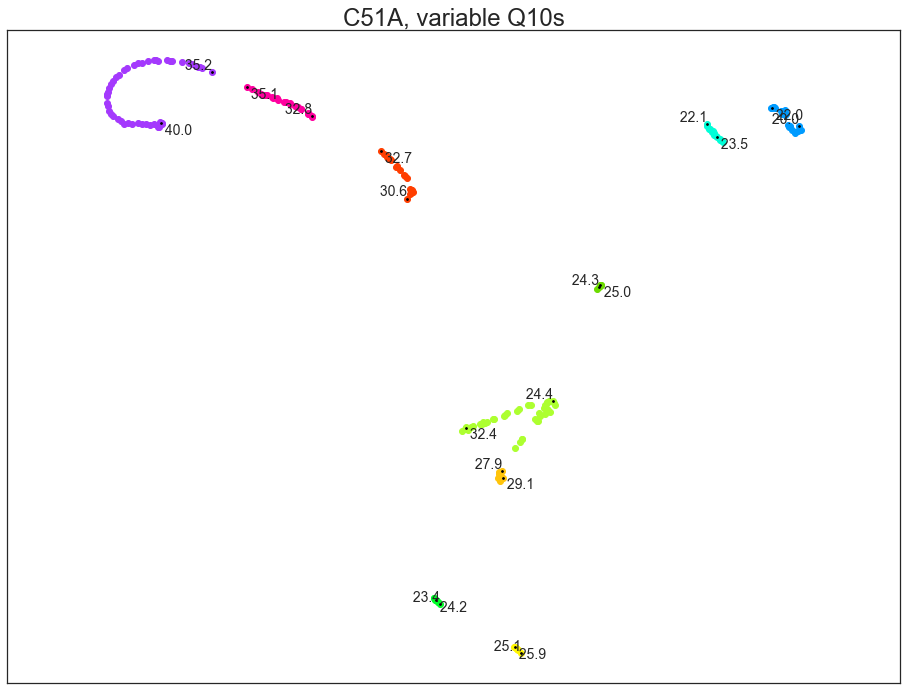

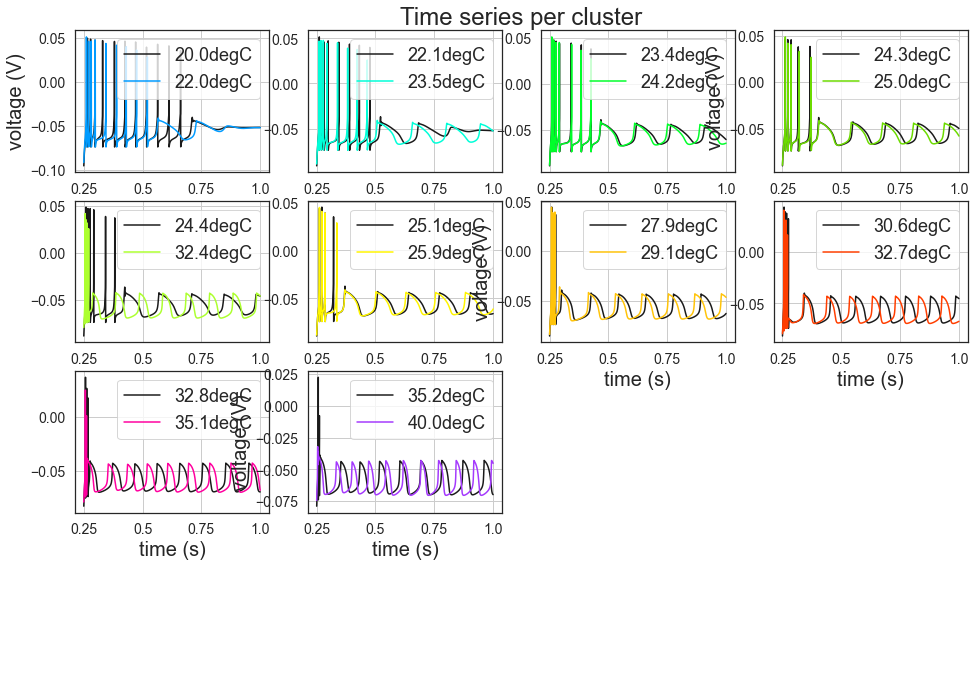

Number of clusters: 3


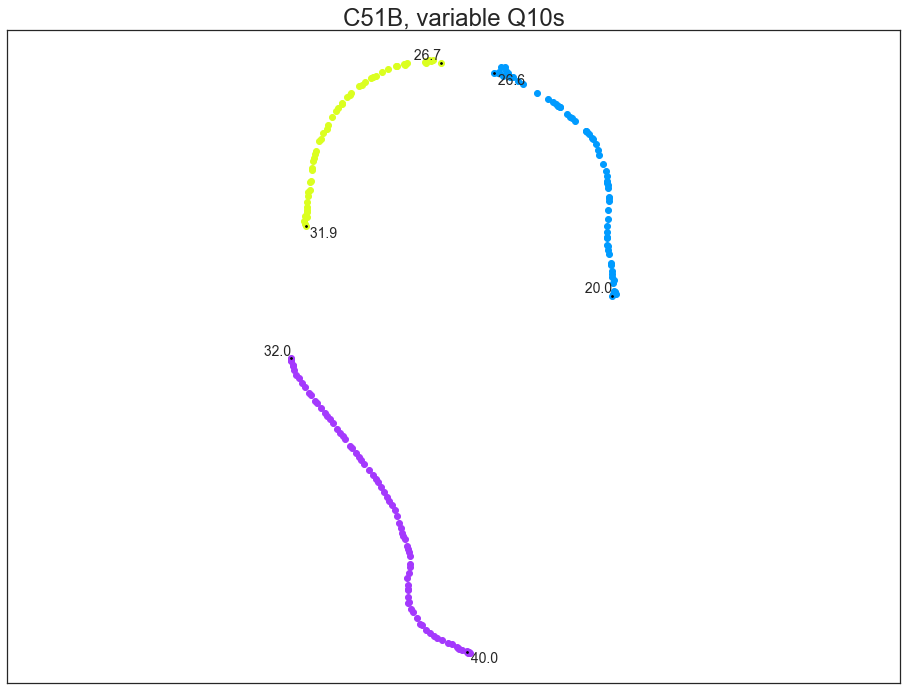

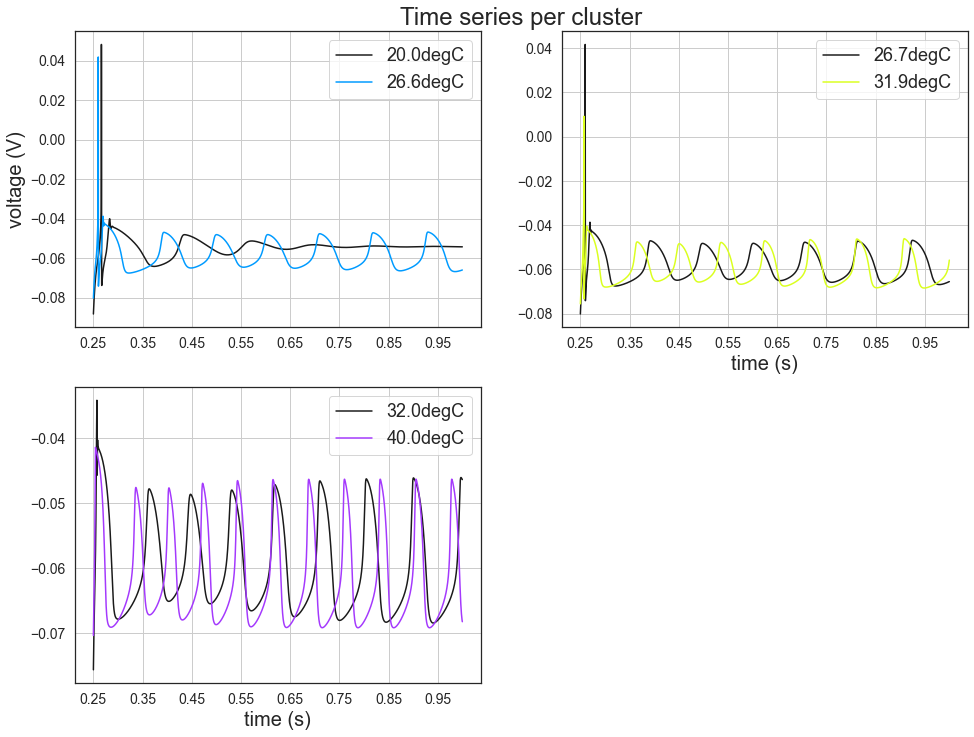

Number of clusters: 3


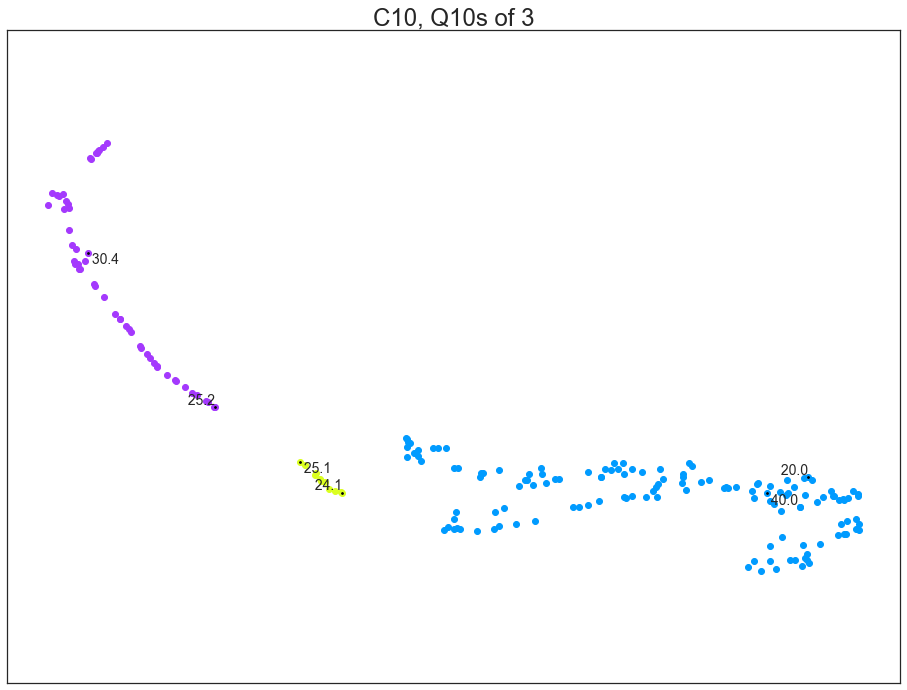

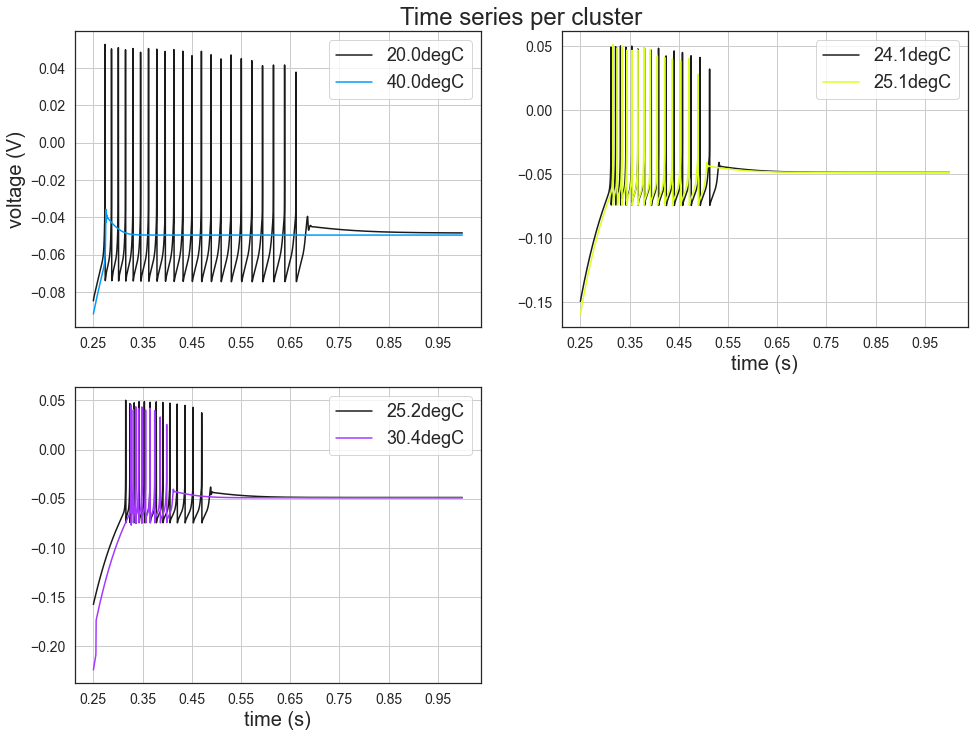

Number of clusters: 5


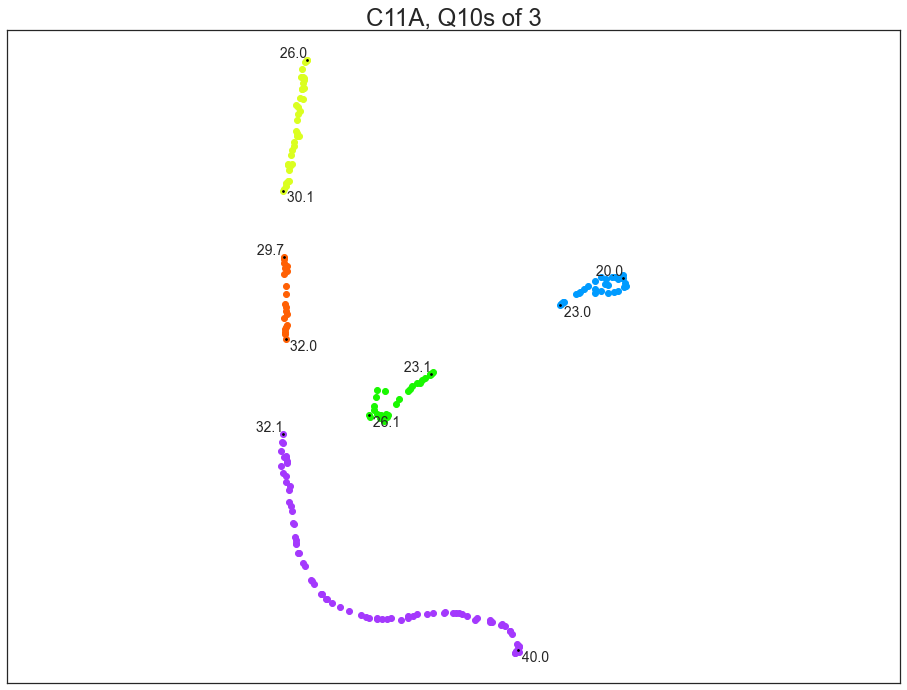

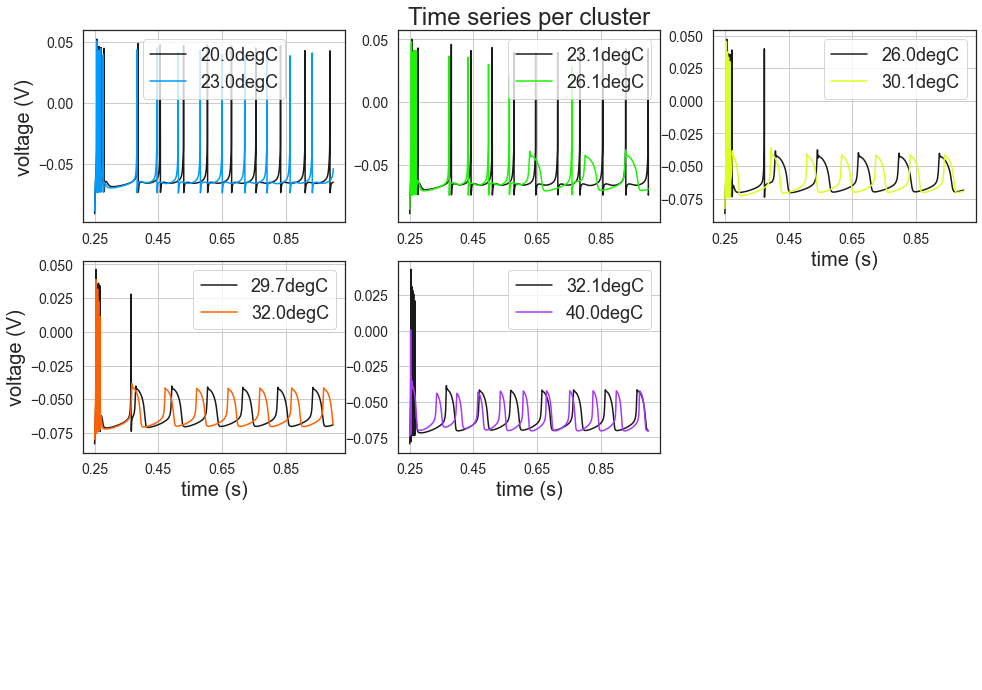

Number of clusters: 3


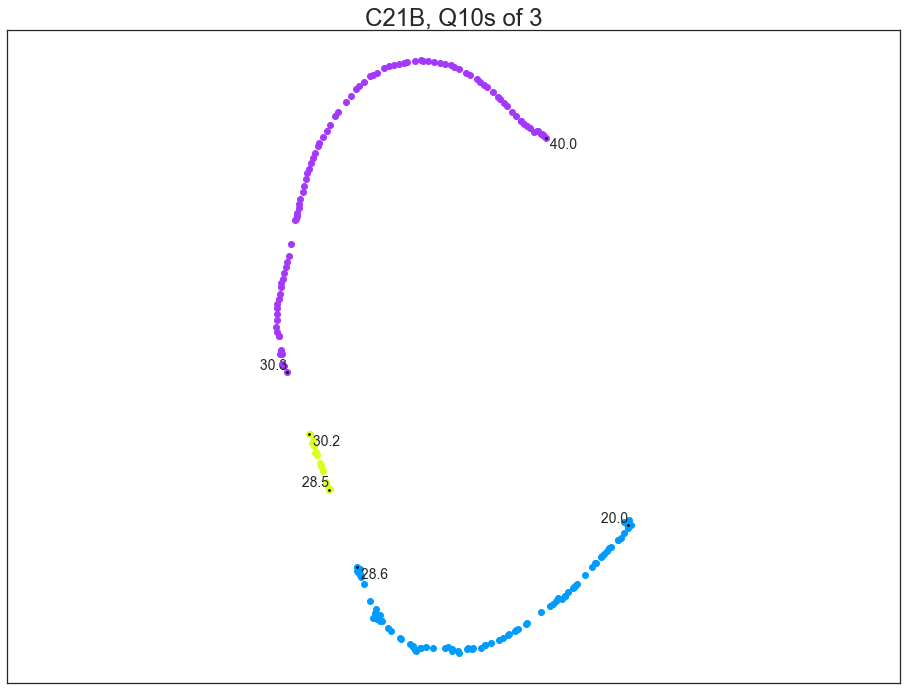

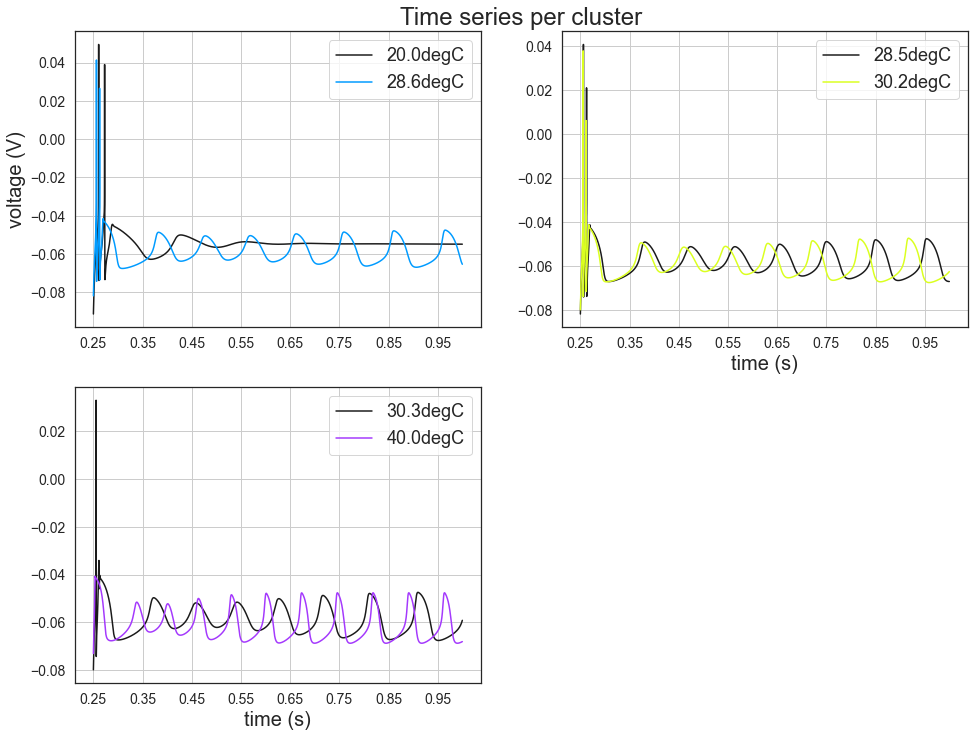

Number of clusters: 4


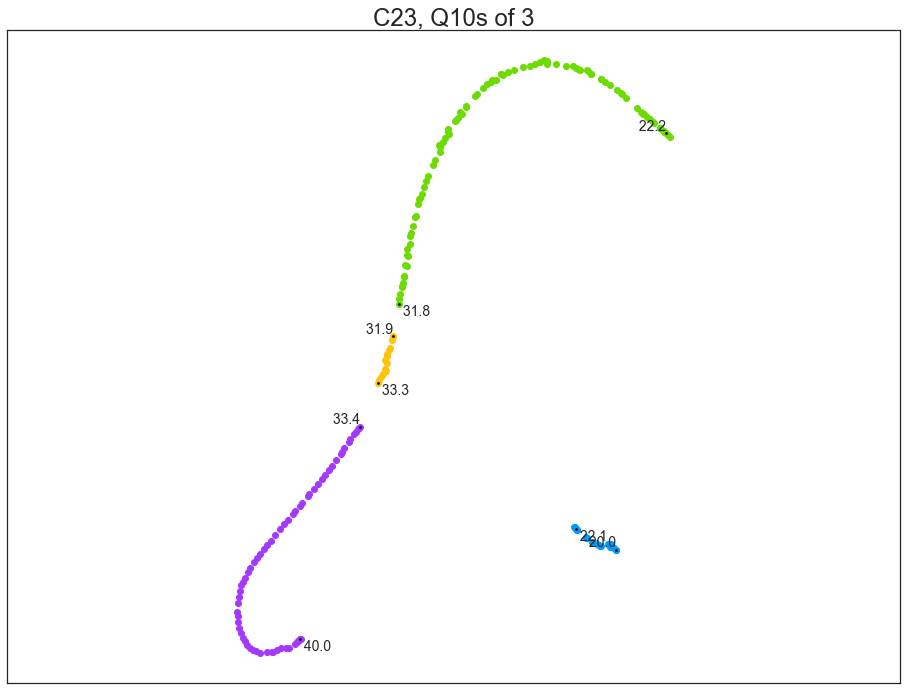

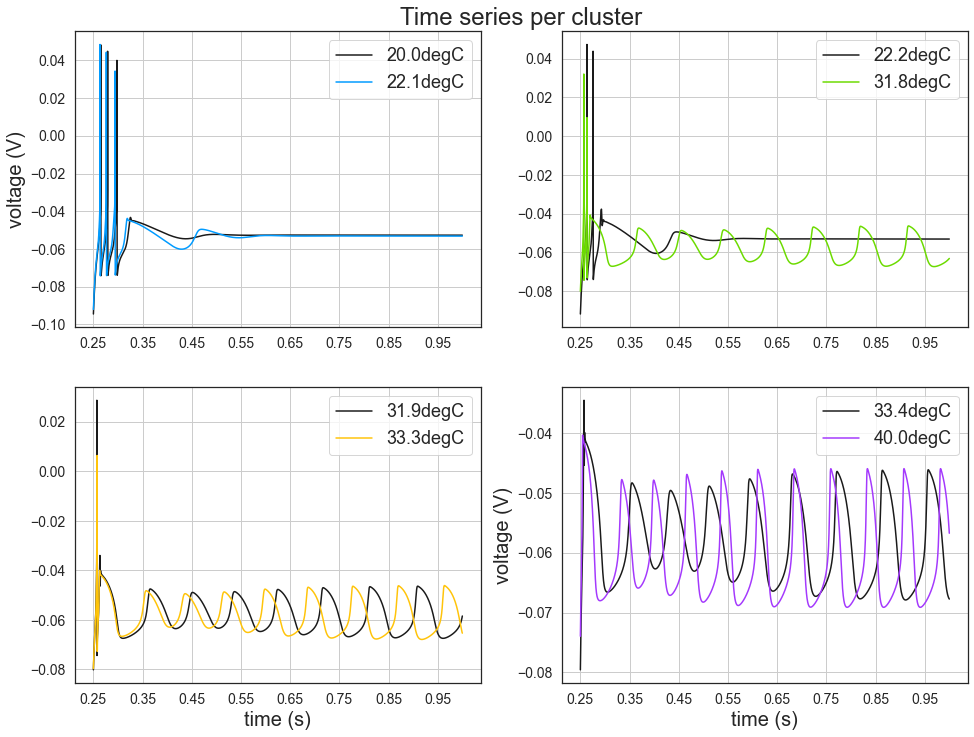

Number of clusters: 2


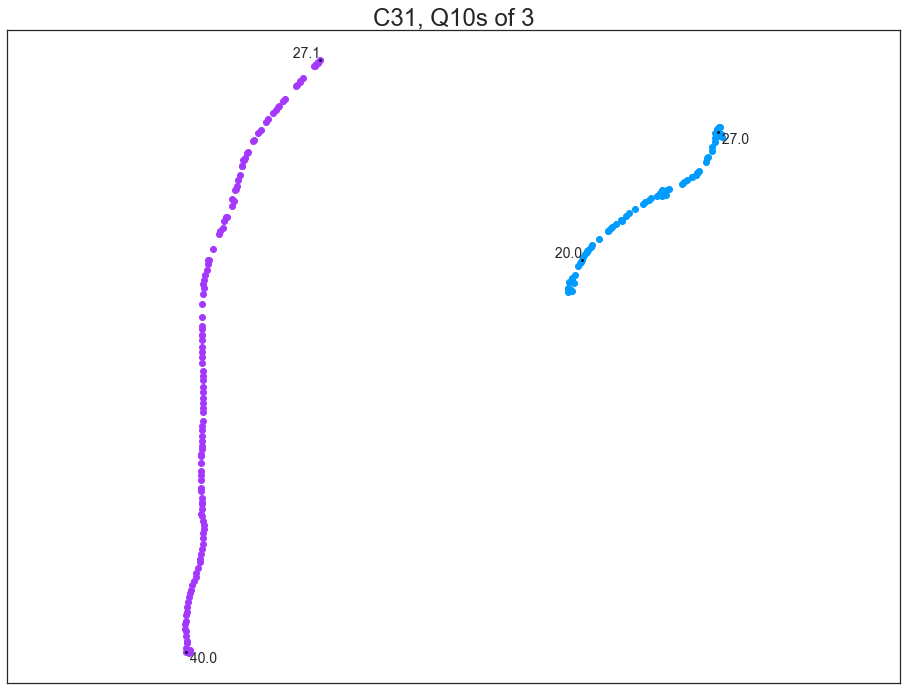

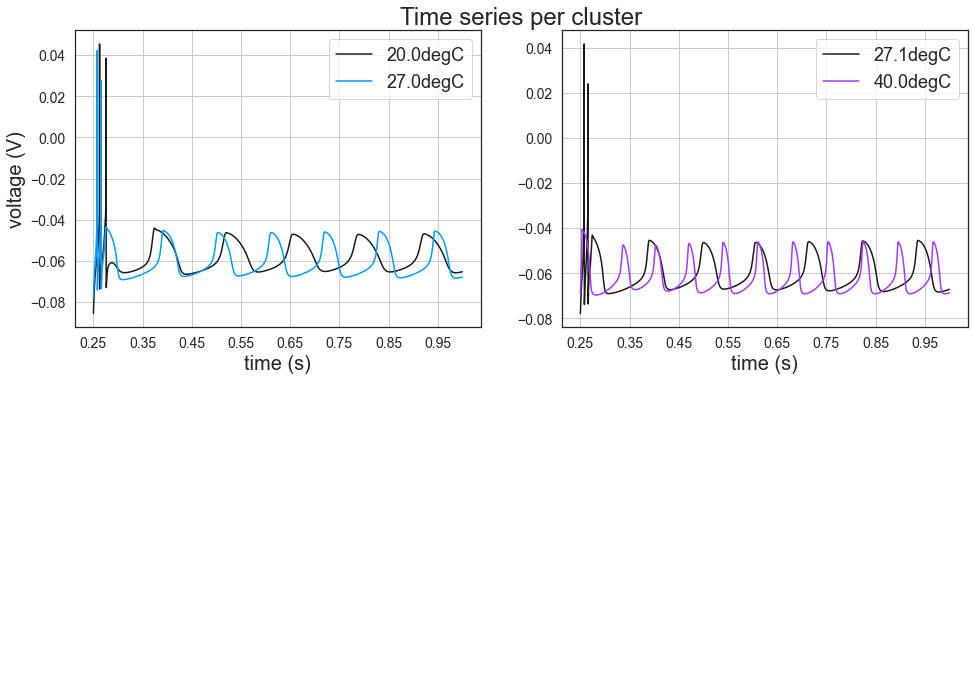

Number of clusters: 8


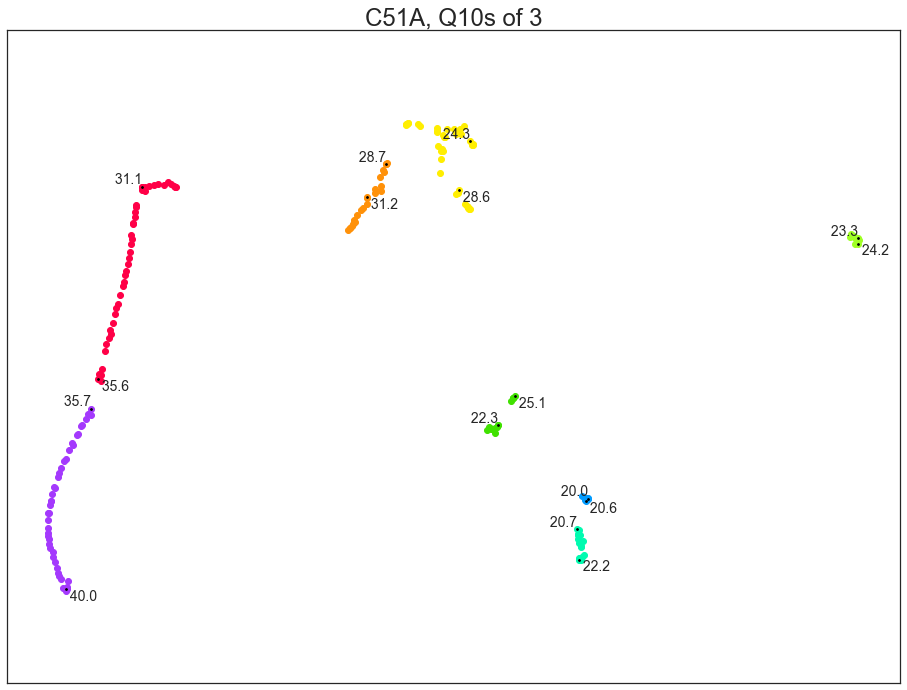

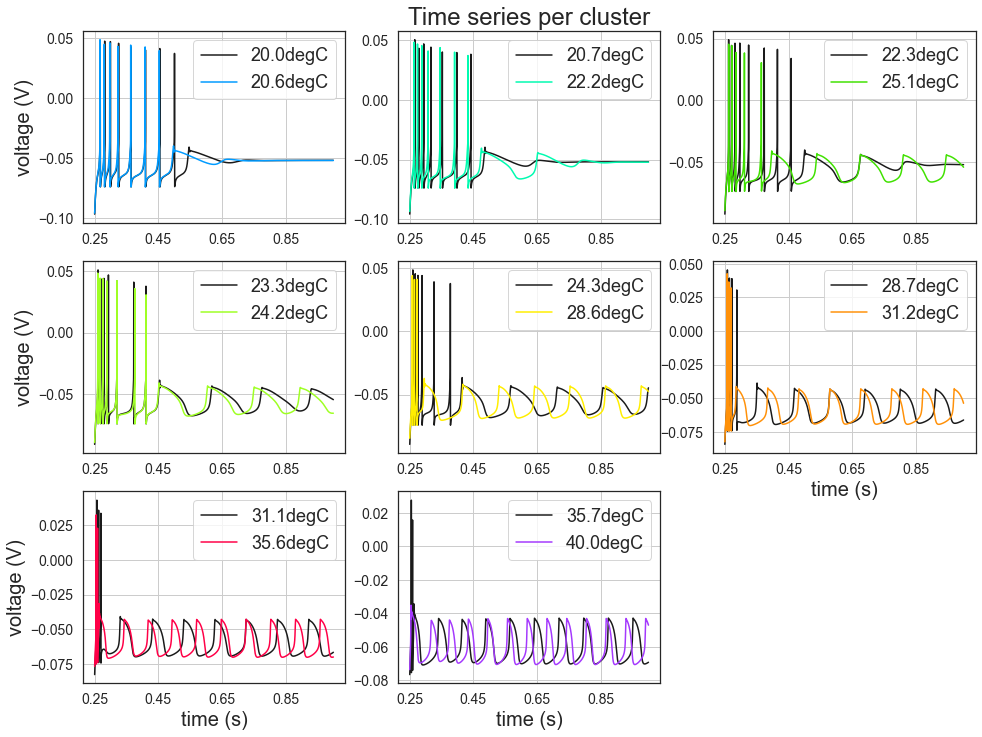

Number of clusters: 3


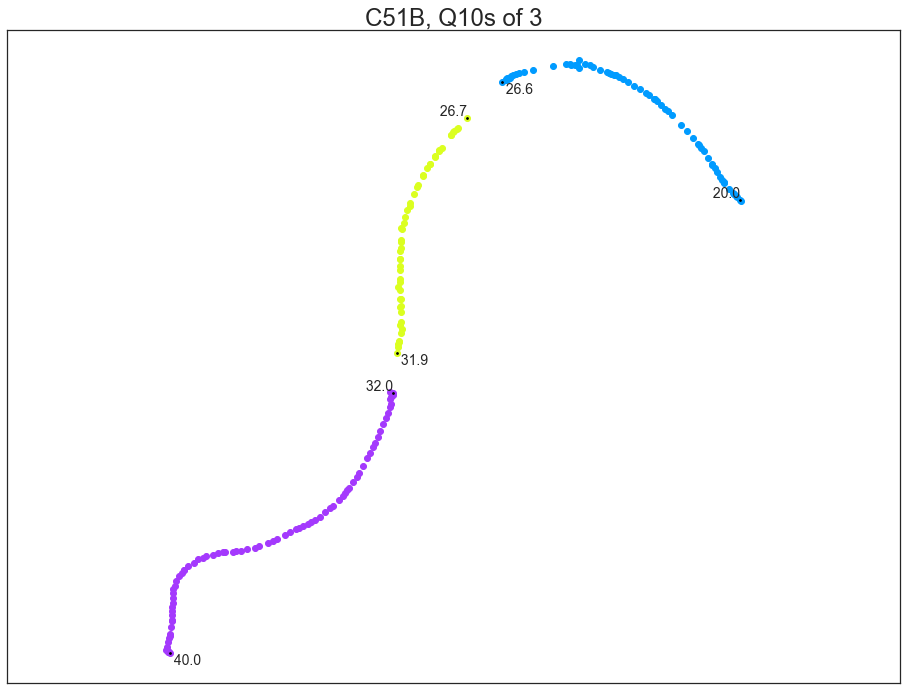

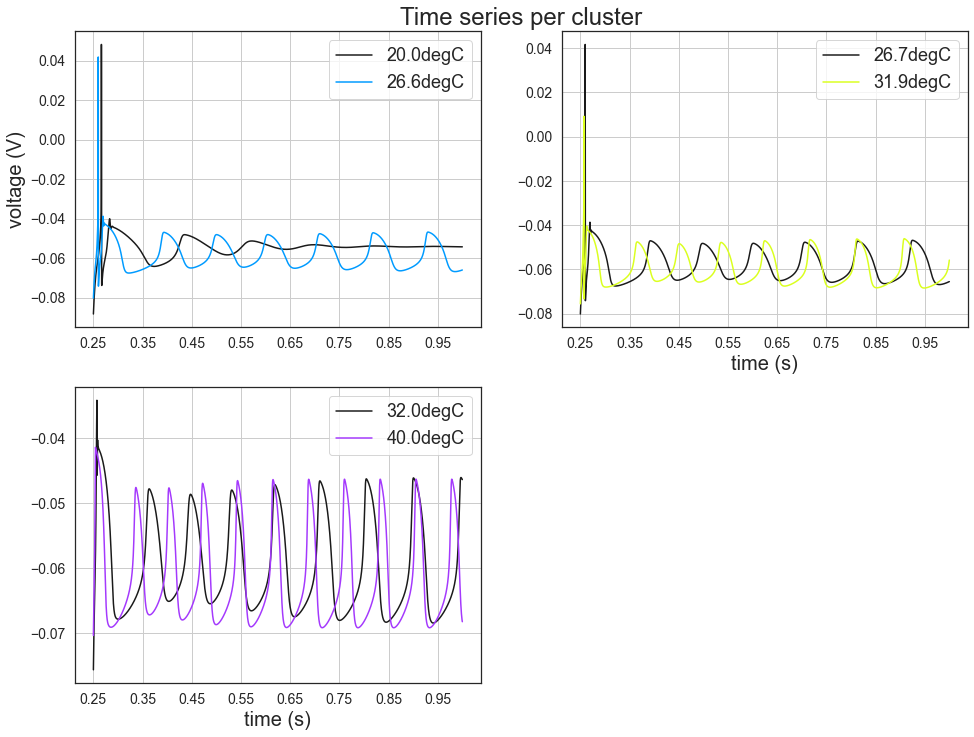

In [7]:
#for cellName in ["3_C10", "3_C11A", "3_C21B", "3_C23", "3_C31", "3_C51A", "3_C51B"]:
#for cellName in ["4_C10", "4_C11A", "4_C21B", "4_C23", "4_C31", "4_C51A", "4_C51B"]:
for cellName in ["3_C10", "3_C11A", "3_C21B", "3_C23", "3_C31", "3_C51A", "3_C51B",
                 "4_C10", "4_C11A", "4_C21B", "4_C23", "4_C31", "4_C51A", "4_C51B"]:
    data_set = pd.read_csv(cellName+".csv", index_col=0)
    
    data_set = data_set.drop(['0.2499'], axis=1)
    reducer = umap.UMAP(metric = 'euclidean', n_neighbors=10)
    embedding = reducer.fit_transform(data_set)
    clrmap = plt.cm.gist_ncar
    db = DBSCAN(eps=1, min_samples=5).fit(embedding)
    labels = db.labels_
    unique_labels = set(labels)
    colors = [clrmap(each) for each in np.linspace(0.15, 0.85, len(unique_labels))]
    print("Number of clusters: " + str(len(unique_labels)))

    %matplotlib inline
    plt.rcParams['figure.figsize'] = [16, 12]
    fig = plt.figure()
    ax = fig.add_subplot(111)


    for i in range(len(labels)):
        col = colors[labels[i]]
        ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
    first = []
    last = []

    for cluster_label in unique_labels:
        for i in range(len(labels)):
            if labels[i] == cluster_label:
                first.append(data_set.iloc[i].name)
                ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
                label = str(data_set.iloc[i].name)
                ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, horizontalalignment='right', verticalalignment='bottom')
                break
        for i in range(len(labels)-1, -1, -1):
            if labels[i] == cluster_label:
                last.append(data_set.iloc[i].name)
                ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
                label = str(data_set.iloc[i].name)
                ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, verticalalignment='top')
                break

    plt.gca().set_aspect('equal', 'datalim')
    if cellName[0] == "3":
        ax.set_title(cellName[2:]+", variable Q10s", fontsize=24)
    if cellName[0] == "4":
        ax.set_title(cellName[2:]+", Q10s of 3", fontsize=24)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    plt.show()
    
    n = m.ceil(m.sqrt(len(unique_labels)))
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14

    data_setT = pd.DataFrame.transpose(data_set)
    colors_low = [clrmap(each-0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]
    colors_high = [clrmap(each+0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]

    fig = plt.figure()
    plt.title('Time series per cluster', fontsize=24)
    plt.box(on=None)
    plt.axis('off')

    for cluster_label in unique_labels:
        ax = fig.add_subplot(n, n, cluster_label+1)
        col = colors[cluster_label]
        col_low = colors_low[cluster_label]
        col_high = colors_high[cluster_label]
        #data_setT[[first[cluster_label], last[cluster_label]]].plot(color={tuple(col_low),tuple(col_high)})  
        data_setT[first[cluster_label]].plot(color='k') 
        data_setT[last[cluster_label]].plot(color=tuple(col)) 
        if cluster_label >= len(unique_labels)-n:
            plt.xlabel('time (s)', fontsize=20)
        if int((cluster_label + 1) % 3) == 1:
            plt.ylabel('voltage (V)', fontsize=20)
        ax.legend([first[cluster_label], last[cluster_label]], fontsize=18)
        ax.grid(True)
        #ax.set_xticks([0.25*5000, 0.5*5000, 0.75*5000, 1.0*5000])
        #ax.set_xticklabels(["0.25", "0.5", "0.75", "1.0"])
        #plt.title('Lowest and highest temperature samples belonging to cluster '+str(cluster_label), color=tuple(col))


    plt.show()